In [1]:
from yolo import YOLO
import cv2
import os
import re
import time
from tqdm import tqdm
from PIL import Image
from PIL import ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import easyocr

In [2]:
yolo = YOLO()

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
logs/best_epoch_weights.pth model, and classes loaded.
Configurations:
----------------------------------------------------------------------
|                     keys |                                   values|
----------------------------------------------------------------------
|               model_path |              logs/best_epoch_weights.pth|
|             classes_path |               model_data/cls_classes.txt|
|             anchors_path |              model_data/yolo_anchors.txt|
|             anchors_mask |        [[6, 7, 8], [3, 4, 5], [0, 1, 2]]|
|              input_shape |                               [640, 640]|
|                      phi |                                        l|
|               confidence |                                      0.5|
|                  nms_iou |                                      0.3|
|          letterbox_image |                        

In [3]:
from PIL import ImageEnhance

def image_enhance(image):
    # 创建图像增强对象
    enhancer = ImageEnhance.Brightness(image)
    # 降低亮度
    brightened_image = enhancer.enhance(0.5)  # 参数为增强倍数

    contrast = ImageEnhance.Contrast(brightened_image)# 調整對比  
    output_c5 = contrast.enhance(5)# 提高對比 

    color = ImageEnhance.Color(output_c5)# 調整飽和度
    output_color5 = color.enhance(0)# 提高飽和度

    return output_color5

In [28]:
reader = easyocr.Reader(['en'])

b'container 0.95' 23 812 106 994


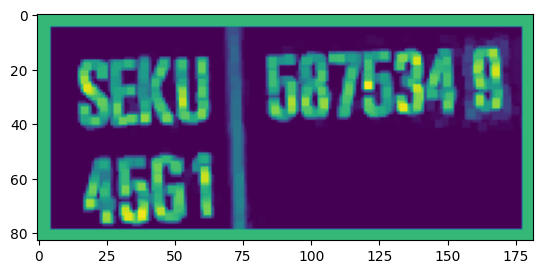

辨識結果 ['SEKU | 687534 0', 'IEGI']
S
30
E
15
K
21
U
32
[30, 15, 21, 32, 6, 8, 7, 5, 3, 4]
3
SEKU6875343


In [5]:
dir_origin_path = "imagetest"
# 定義膨脹和侵蝕的核
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel4 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

image_path  = 'imagetest/SEKU5875349.jpg'
# print(image_path)
image       = Image.open(image_path)
image,boxs,_     = yolo.detect_image(image)
cropped_image = image.crop(boxs)

enhanceimage = image_enhance(cropped_image)

# 将图像转换为灰度图像
gray_image = enhanceimage.convert("L")
image = np.array(gray_image)
# print(np.unique(image))
# ret,binary = cv2.threshold(image,50,255,cv2.THRESH_BINARY)
# print(type(binary))


# 侵蝕圖像
# erosion = cv2.erode(image, kernel2, iterations=1)
# 膨脹圖像
dilationimage = cv2.dilate(image, kernel3, iterations=1)



dilationimage2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel3)

# 執行平均濾波
kernel_size = (1, 1)  # 濾波器的大小
smoothed_image = cv2.blur(dilationimage2, kernel_size)

# 將 NumPy 陣列轉換為 PIL 形式的圖像
pil_image = Image.fromarray(dilationimage)

sharpness = ImageEnhance.Sharpness(pil_image)# 調整銳利度
output_s15 = sharpness.enhance(1)# 提高銳利度
# output_s15 = sharpness.enhance(88)# 提高銳利度


image2 = np.array(output_s15)
# 侵蝕圖像
erosion = cv2.erode(image2, kernel, iterations=1)

# break
plt.imshow(output_s15)
plt.show()
# reader = easyocr.Reader(['en'])
result = reader.readtext(np.array(output_s15),detail = 0)
print("辨識結果",result)

E = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
D = [10,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38]
EtoD = []

result2 = re.sub('[^a-zA-Z0-9]', '', str(result))
result2 = result2.upper()
if result2[4] == "1":
    result2 = result2[:4]+result2[5:]
    
for char in result2[:10]:
    if char.isalpha():
        print(char)
        index = E.index(char)
        # print(index)
        print(D[index])
        EtoD.append(D[index])
    else:
        EtoD.append(int(char))
print(EtoD)
#計算第11個數字
sum=0
for i in range(len(EtoD)):
    sum+=EtoD[i]*(2**i)
if sum%11==10:
    sum=0
else:
    sum = sum%11
print(sum)
finalnumber = result2[:10]+str(sum)
merged_finalnumber = "".join(finalnumber)
print(merged_finalnumber)

In [6]:
# dir_origin_path = "imagetest"
# # 定義膨脹和侵蝕的核
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# image_path  = 'imagetest/WHSU6856285.jpg'
# # print(image_path)
# image       = Image.open(image_path)
# image,boxs     = yolo.detect_image(image)
# cropped_image = image.crop(boxs)

# enhanceimage = image_enhance(cropped_image)

# # 将图像转换为灰度图像
# gray_image = enhanceimage.convert("L")
# image = np.array(gray_image)

# # 膨脹圖像
# dilationimage = cv2.dilate(image, kernel, iterations=1)

# dilationimage2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# # 執行平均濾波
# kernel_size = (2, 2)  # 濾波器的大小
# smoothed_image = cv2.blur(dilationimage2, kernel_size)

# # 將 NumPy 陣列轉換為 PIL 形式的圖像
# pil_image = Image.fromarray(smoothed_image)

# sharpness = ImageEnhance.Sharpness(pil_image)# 調整銳利度
# output_s15 = sharpness.enhance(4)# 提高銳利度
# # output_s15 = sharpness.enhance(88)# 提高銳利度


# image2 = np.array(output_s15)
# # 侵蝕圖像
# erosion = cv2.erode(image2, kernel, iterations=1)

# # break
# plt.imshow(output_s15)
# plt.show()
# reader = easyocr.Reader(['en'])
# result = reader.readtext(np.array(output_s15),detail = 0)
# print("辨識結果",result)

In [7]:
# dir_origin_path = "imagetest"
# # 定義膨脹和侵蝕的核
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# a = 0
# img_names = os.listdir(dir_origin_path)
# for img_name in tqdm(img_names):
#     a+=1
#     if img_name.lower().endswith(('.bmp', '.dib', '.png', '.jpg', '.jpeg', '.pbm', '.pgm', '.ppm', '.tif', '.tiff')):
#         image_path  = os.path.join(dir_origin_path, img_name)
#         # print(image_path)
#         image       = Image.open(image_path)
#         image,boxs     = yolo.detect_image(image)
#         cropped_image = image.crop(boxs)

#         enhanceimage = image_enhance(cropped_image)

#         # 将图像转换为灰度图像
#         gray_image = enhanceimage.convert("L")
#         image = np.array(gray_image)
        
#         # 膨脹圖像
#         dilationimage = cv2.dilate(image, kernel, iterations=1)



#         dilationimage2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

#         # 執行平均濾波
#         kernel_size = (3, 3)  # 濾波器的大小
#         smoothed_image = cv2.blur(dilationimage2, kernel_size)

#         # 將 NumPy 陣列轉換為 PIL 形式的圖像
#         pil_image = Image.fromarray(smoothed_image)

#         sharpness = ImageEnhance.Sharpness(pil_image)# 調整銳利度
#         output_s15 = sharpness.enhance(9)# 提高銳利度


#         image2 = np.array(output_s15)
#         # 侵蝕圖像
#         erosion = cv2.erode(image2, kernel, iterations=1)

#         # break
#         plt.imshow(output_s15)
#         plt.show()
#         reader = easyocr.Reader(['en'])
#         result = reader.readtext(np.array(output_s15),detail = 0)
#         print("辨識結果",result)
#         # if a ==2:
#         #     break
    

In [8]:
# dir_origin_path = "imagetest"
# # 定義膨脹和侵蝕的核
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# a = 0
# img_names = os.listdir(dir_origin_path)
# for img_name in tqdm(img_names):
#     a+=1
#     if img_name.lower().endswith(('.bmp', '.dib', '.png', '.jpg', '.jpeg', '.pbm', '.pgm', '.ppm', '.tif', '.tiff')):
#         image_path  = os.path.join(dir_origin_path, img_name)
#         # print(image_path)
#         image       = Image.open(image_path)
#         image,boxs     = yolo.detect_image(image)
#         cropped_image = image.crop(boxs)

#         enhanceimage = image_enhance(cropped_image)

#         # 将图像转换为灰度图像
#         gray_image = enhanceimage.convert("L")
#         image = np.array(gray_image)
        
#         #閉運算
#         dilationimage2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

#         # 執行平均濾波
#         kernel_size = (2, 2)  # 濾波器的大小
#         smoothed_image = cv2.blur(dilationimage2, kernel_size)

#         # 將 NumPy 陣列轉換為 PIL 形式的圖像
#         pil_image = Image.fromarray(smoothed_image)

#         sharpness = ImageEnhance.Sharpness(pil_image)# 調整銳利度
#         output_s15 = sharpness.enhance(4)# 提高銳利度

#         # break
#         plt.imshow(output_s15)
#         plt.show()
#         reader = easyocr.Reader(['en'])
#         result = reader.readtext(np.array(output_s15),detail = 0)
#         print("辨識結果",result)
#         # if a ==2:
#         #     break
    

In [9]:
# dir_origin_path = "imagetest"
# # 定義膨脹和侵蝕的核
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# image_path  = 'imagetest/MAGU5605323.jpg'
# # print(image_path)
# image       = Image.open(image_path)
# image,boxs     = yolo.detect_image(image)
# print(image)
# cropped_image = image.crop(boxs)

# enhanceimage = image_enhance(cropped_image)

# # 将图像转换为灰度图像
# gray_image = enhanceimage.convert("L")
# image = np.array(gray_image)

# #閉運算
# dilationimage2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# # 執行平均濾波
# kernel_size = (2, 2)  # 濾波器的大小
# smoothed_image = cv2.blur(dilationimage2, kernel_size)

# # 將 NumPy 陣列轉換為 PIL 形式的圖像
# pil_image = Image.fromarray(smoothed_image)

# sharpness = ImageEnhance.Sharpness(pil_image)# 調整銳利度
# output_s15 = sharpness.enhance(4)# 提高銳利度

# # break
# plt.imshow(output_s15)
# plt.show()
# reader = easyocr.Reader(['en'])
# result = reader.readtext(np.array(output_s15),detail = 0)
# print("辨識結果",result)
    

In [10]:
# if len(result[0]) > 4:
#     #只保留數字
#     Dstring = re.sub(r"\D", "", result[0])
#     if Dstring[0] == "1":
#         Dstring = Dstring[1:] #首位數字如果是1，將其去除
#         Dstring = Dstring[:6] #保留前6個數字
#         print(Dstring)
#     if len(Dstring) > 6:
#         Dstring = Dstring[:6] #保留前6個數字
#         print(Dstring)
# else:
#     #取得數字
#     Dstring = result[1]
#     #只保留數字
#     Dstring = re.sub(r"\D", "", result[1])
#     print(Dstring)
#     if Dstring[0] == "1":
#         Dstring = Dstring[1:] #首位數字如果是1，將其去除
#         # print(Dstring)
#         Dstring = Dstring[:6] #保留前6個數字
#         print(Dstring)
#     if len(Dstring) > 6:
#         Dstring = Dstring[:6] #保留前6個數字
#         print(Dstring)

In [11]:
# #對前四個英文字進行正則表達式，只保留英文的部分
# Estring = re.sub('[^a-zA-Z]', '', result[0])
# #取得數字
# # Dstring = result[1]
# imgName = image_path.split(".jpg")[0]
# if len(result[0]) > 4:
#     #只保留數字
#     Dstring = re.sub(r"\D", "", result[0])
#     if Dstring[0] == "1":
#         Dstring = Dstring.replace(Dstring[0], "") #首位數字如果是1，將其去除
#         Dstring = Dstring[:6] #保留前6個數字
#         print(Dstring)
#     if len(Dstring) > 6:
#         Dstring = Dstring[:6] #保留前6個數字
#         print(Dstring)
# else:
#     #取得數字
#     Dstring = result[1]
#     #只保留數字
#     Dstring = re.sub(r"\D", "", result[1])
#     print(Dstring)
#     if Dstring[0] == "1":
#         Dstring = Dstring.replace(Dstring[0], "") #首位數字如果是1，將其去除
#         Dstring = Dstring[:6] #保留前6個數字
#         print(Dstring)
#     if len(Dstring) > 6:
#         Dstring = Dstring[:6] #保留前6個數字
#         print(Dstring)

# #將英文字都轉成大寫
# upper_case_string = Estring.upper()

# E = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
# D = [10,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38]
# Earray = []
# Darray = []
# EtoD = []
# #將每個英文字放入陣列中
# for char in upper_case_string:
#     Earray.append(char)
# #將每個數字放入陣列中
# for char in Dstring:
#     Darray.append(int(char))
# #從Earray找到E陣列中對應的索引值，藉由此索引值找到D陣列中對應的數字(英轉數)
# for i in range(len(Earray)):
#     value = Earray[i]
#     index = E.index(value)
#     EtoD.append(D[index])
# EtoD.extend(Darray)
# print(len(EtoD))

# #計算第11個數字
# sum=0
# for i in range(len(EtoD)):
#     sum+=EtoD[i]*(2**i)
# if sum%11==10:
#     sum=0
# else:
#     sum = sum%11
# print(EtoD)
# print(sum)

# finalnumber = [upper_case_string,Dstring,str(sum)]
# merged_finalnumber = "".join(finalnumber)
# print(merged_finalnumber)
# print(imgName)

In [12]:
# reader = easyocr.Reader(['en'])

b'container 0.95' 75 791 180 1058


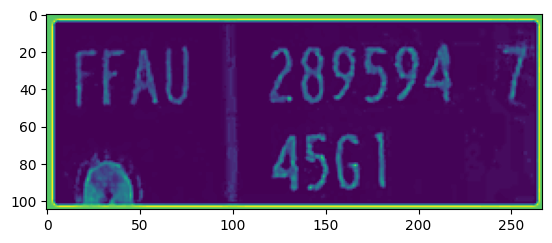

easyocr辨識結果: ['FFau', '289594', '456 |']
--辨識結果經過處理與計算後--
辨識號碼: FFAU2895947
實際號碼: FFAU2895947
b'container 0.91' 377 867 501 1227


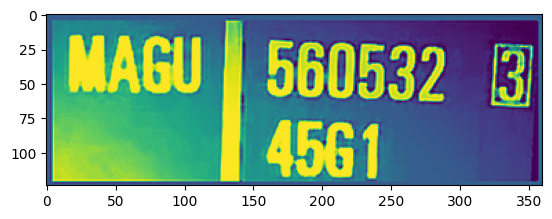

easyocr辨識結果: ['MAGU', '560532', 'B', '4561']
--辨識結果經過處理與計算後--
辨識號碼: MAGU5605323
實際號碼: MAGU5605323
b'container 0.95' 23 812 106 994


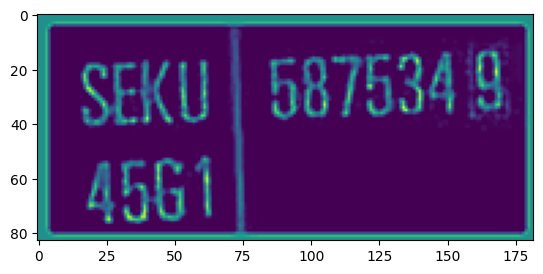

easyocr辨識結果: ['SEKU | 587534 9', '4561']
--辨識結果經過處理與計算後--
辨識號碼: SEKU5875349
實際號碼: SEKU5875349
b'container 0.94' 99 878 226 1162


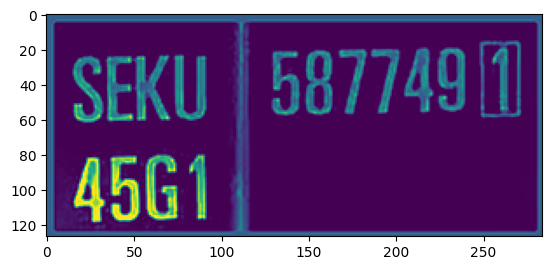

easyocr辨識結果: ['SEKU', '587749', '4561']
--辨識結果經過處理與計算後--
辨識號碼: SEKU5877491
實際號碼: SEKU5877491
b'container 0.96' 175 658 240 794


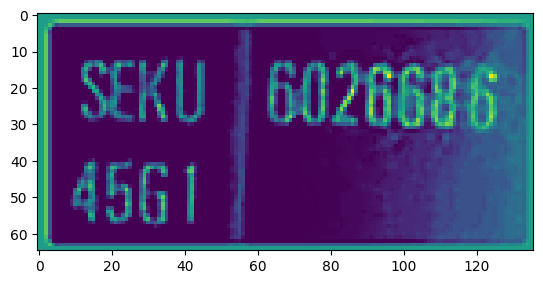

easyocr辨識結果: ['SEKU | 602668 6', '4561']
--辨識結果經過處理與計算後--
辨識號碼: SEKU6026686
實際號碼: SEKU6026686
b'container 0.95' 115 792 234 1114


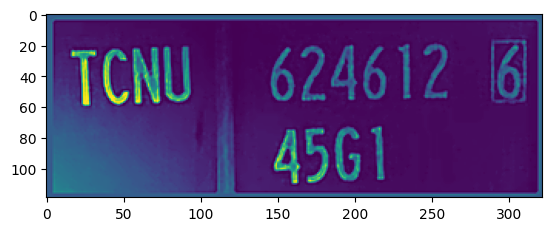

easyocr辨識結果: ['TCNU', '624612', 'l6]', '4561']
--辨識結果經過處理與計算後--
辨識號碼: TCNU6246126
實際號碼: TCNU6246126
b'container 0.93' 325 880 452 1184


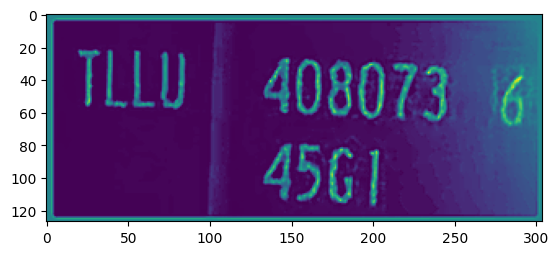

easyocr辨識結果: ['TLLU', '408073', '6', '4561']
--辨識結果經過處理與計算後--
辨識號碼: TLLU4080736
實際號碼: TLLU4080736
b'container 0.96' 72 552 142 741


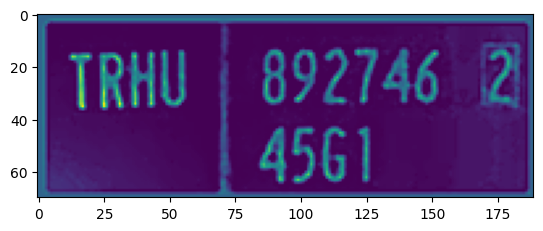

easyocr辨識結果: ['TRHU', '892746 2', '4561']
--辨識結果經過處理與計算後--
辨識號碼: TRHU8927462
實際號碼: TRHU8927462
b'container 0.96' 106 491 191 710


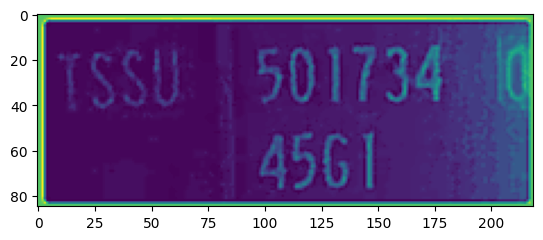

easyocr辨識結果: ['TSSU', '501734', '456 [']
--辨識結果經過處理與計算後--
辨識號碼: TSSU5017340
實際號碼: TSSU5017340
b'container 0.93' 23 447 86 611


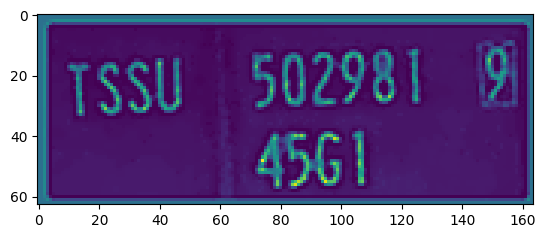

easyocr辨識結果: ['TSSU', '502981', '4561']
--辨識結果經過處理與計算後--
辨識號碼: TSSU5029819
實際號碼: TSSU5029819
b'container 0.93' 24 837 103 1039


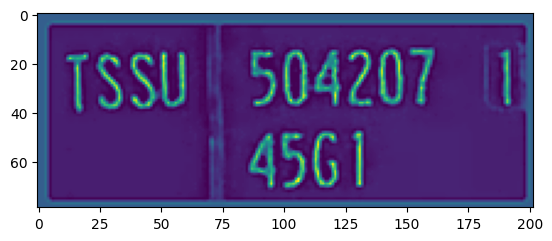

easyocr辨識結果: ['TSSU', '504207', '456 1']
--辨識結果經過處理與計算後--
辨識號碼: TSSU5042071
實際號碼: TSSU5042071
b'container 0.94' 40 488 102 650


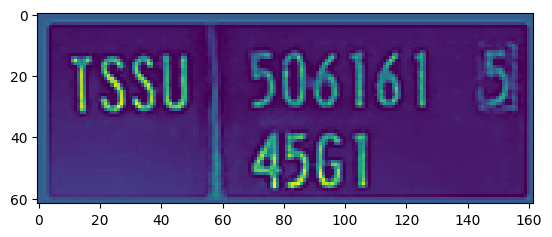

easyocr辨識結果: ['TSSU', '506161', '4561']
--辨識結果經過處理與計算後--
辨識號碼: TSSU5061615
實際號碼: TSSU5061615
b'container 0.96' 105 608 213 902


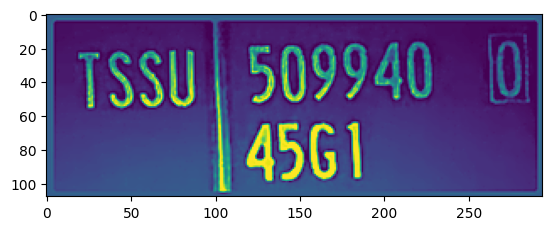

easyocr辨識結果: ['TSSU', '509940', '4561']
--辨識結果經過處理與計算後--
辨識號碼: TSSU5099400
實際號碼: TSSU5099400
b'container 0.92' 273 714 423 1156


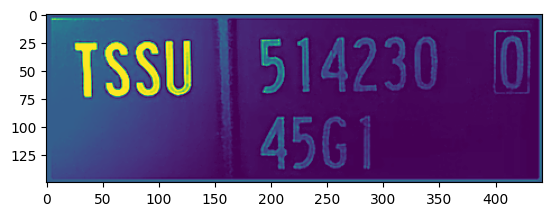

easyocr辨識結果: ['TSSU', '514230', '4561']
--辨識結果經過處理與計算後--
辨識號碼: TSSU5142300
實際號碼: TSSU5142300
b'container 0.95' 68 547 142 738


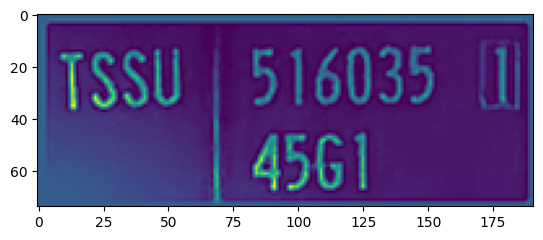

easyocr辨識結果: ['TSSU', '516035', '4561']
--辨識結果經過處理與計算後--
辨識號碼: TSSU5160351
實際號碼: TSSU5160351
b'container 0.93' 272 908 371 1175


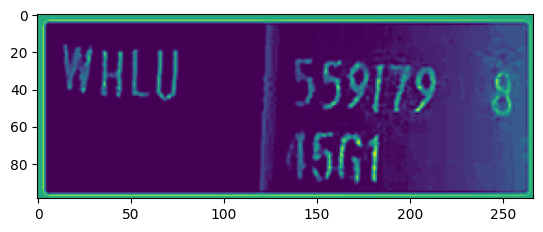

easyocr辨識結果: ['WHLU', '559179', '1561']
--辨識結果經過處理與計算後--
辨識號碼: WHLU5591798
實際號碼: WHLU5591798
b'container 0.93' 244 907 347 1158


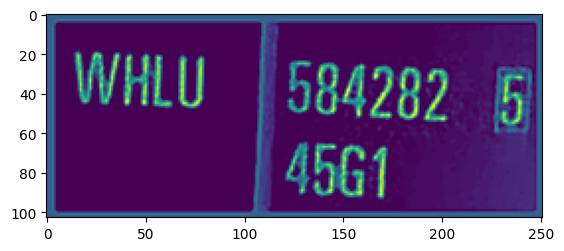

easyocr辨識結果: ['WHLU', '584282', '5', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHLU5842825
實際號碼: WHLU5842825
b'container 0.96' 159 962 202 1072


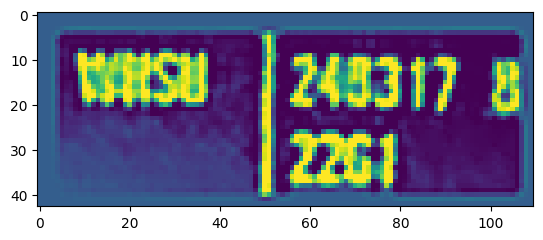

easyocr辨識結果: ['Mr', '248J17', '251']
--辨識結果經過處理與計算後--
辨識號碼: MR248174
實際號碼: WHSU2483178
b'container 0.95' 76 869 167 1116


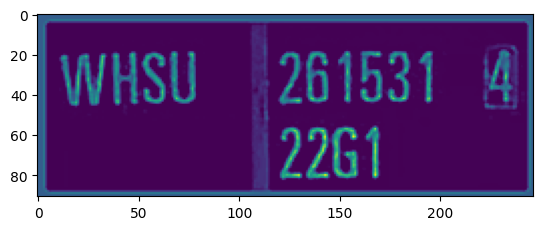

easyocr辨識結果: ['WHSU', '261531', '2261']
--辨識結果經過處理與計算後--
辨識號碼: WHSU2615314
實際號碼: WHSU2615314
b'container 0.94' 376 862 492 1172


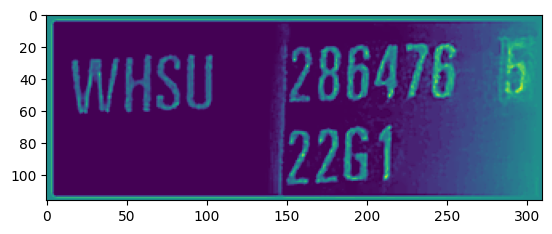

easyocr辨識結果: ['WHSU', '286476', '122g1']
--辨識結果經過處理與計算後--
辨識號碼: WHSU2864765
實際號碼: WHSU2864765
b'container 0.95' 89 786 194 1085


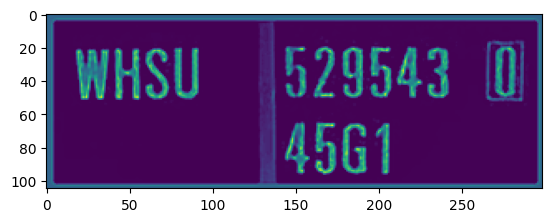

easyocr辨識結果: ['WHSU', '529543', '45G1']
--辨識結果經過處理與計算後--
辨識號碼: WHSU5295430
實際號碼: WHSU5295430
b'container 0.94' 111 746 224 1053


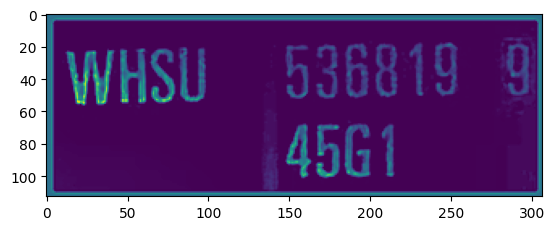

easyocr辨識結果: ['WHSU', '536819', '45G1']
--辨識結果經過處理與計算後--
辨識號碼: WHSU5368199
實際號碼: WHSU5368199
b'container 0.95' 269 689 369 963


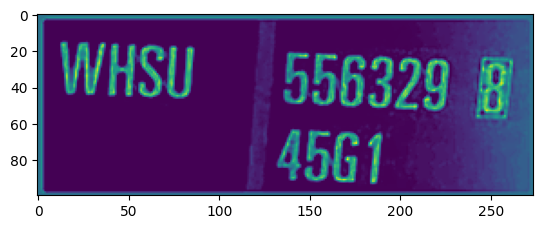

easyocr辨識結果: ['WHSU', '556329 8', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHSU5563298
實際號碼: WHSU5563298
b'container 0.90' 622 942 824 1534


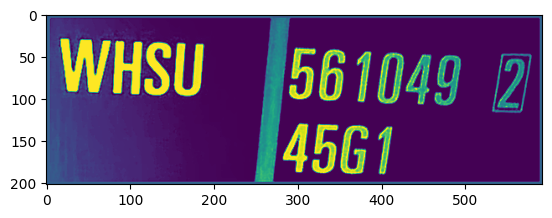

easyocr辨識結果: ['WHSU', '561049', '12', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHSU5610492
實際號碼: WHSU5610492
b'container 0.93' 100 743 212 1047


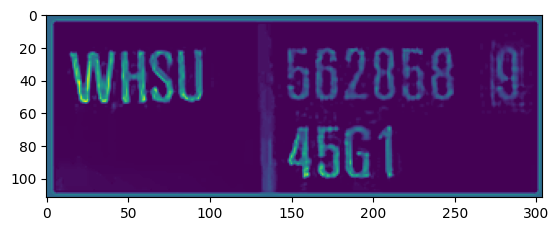

easyocr辨識結果: ['WHSU', '562858  19', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHSU5628589
實際號碼: WHSU5628589
b'container 0.93' 462 935 623 1398


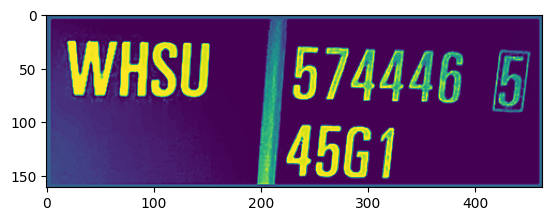

easyocr辨識結果: ['WHSU', '574446 5', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHSU5744465
實際號碼: WHSU5744465
b'container 0.94' 84 503 164 726


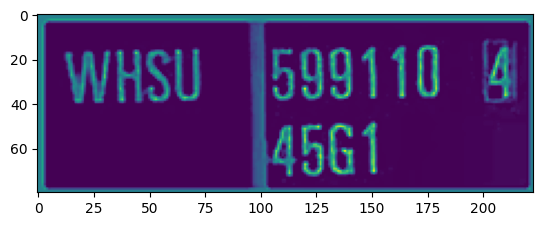

easyocr辨識結果: ['WHSU', '1599110', '45G1']
--辨識結果經過處理與計算後--
辨識號碼: WHSU5991104
實際號碼: WHSU5991104
b'container 0.95' 49 543 117 728


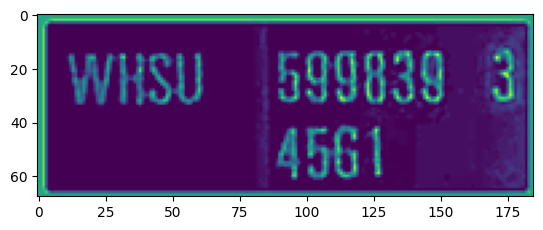

easyocr辨識結果: ['WHSU', '599830', '456 |']
--辨識結果經過處理與計算後--
辨識號碼: WHSU5998304
實際號碼: WHSU5998393
b'container 0.93' 422 765 585 1215


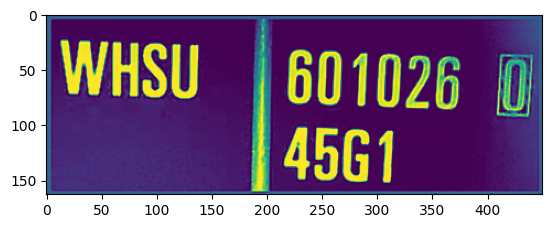

easyocr辨識結果: ['WHSU', '601026', 'UU', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHSU6010260
實際號碼: WHSU6010260
b'container 0.95' 287 558 388 831


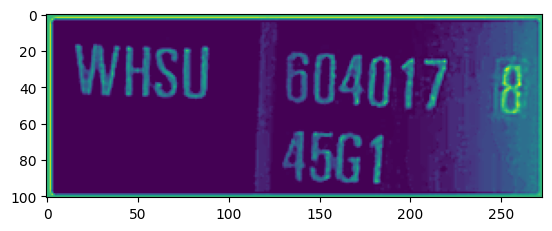

easyocr辨識結果: ['WHSU', '604017', '8', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHSU6040178
實際號碼: WHSU6040178
b'container 0.93' 248 899 345 1151


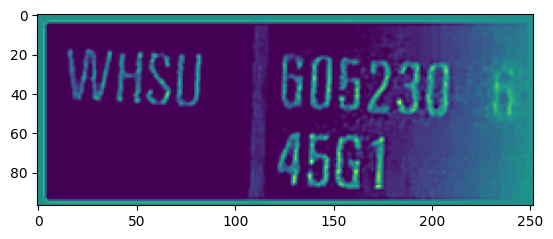

easyocr辨識結果: ['WHSU', '605230', '45G1']
--辨識結果經過處理與計算後--
辨識號碼: WHSU6052306
實際號碼: WHSU6052306
b'container 0.95' 356 684 487 1047


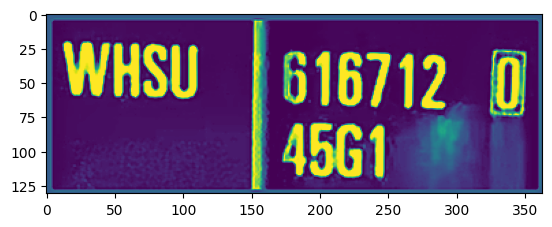

easyocr辨識結果: ['WHSU', '616712', '10}', '45G1']
--辨識結果經過處理與計算後--
辨識號碼: WHSU6167120
實際號碼: WHSU6167120
b'container 0.94' 16 544 74 707


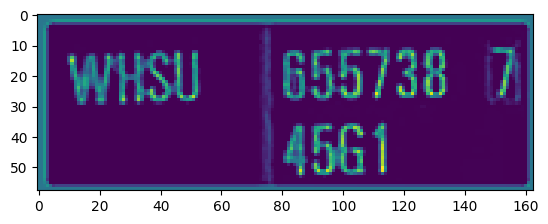

easyocr辨識結果: ['WHSU', '655738', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHSU6557387
實際號碼: WHSU6557387
b'container 0.94' 110 742 234 1110


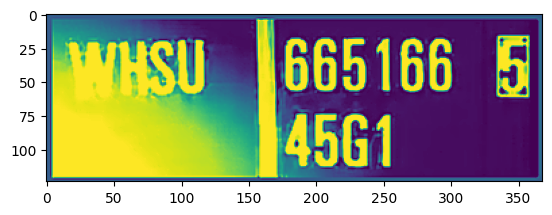

easyocr辨識結果: ['WHSU', '665166', '5', '4561']
--辨識結果經過處理與計算後--
辨識號碼: WHSU6651665
實際號碼: WHSU6651665
b'container 0.89' 266 682 428 1189


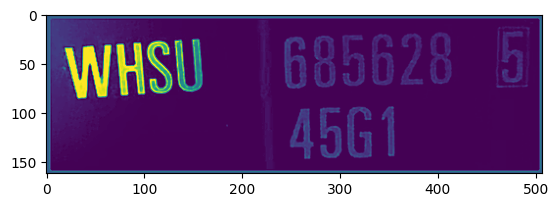

easyocr辨識結果: ['WHSU', '685628', '45G1']
--辨識結果經過處理與計算後--
辨識號碼: WHSU6856285
實際號碼: WHSU6856285
辨識正確的數量: 33
總數量: 35
辨識錯誤的號碼 ['WHSU2483178', 'WHSU5998393']
準確率: 0.9428571428571428


In [41]:
dir_origin_path = "imagetest"
# 定義膨脹和侵蝕的核
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

totalData_Pred = []
totalData_True = []
totalData_True = []
Not = []
img_names = os.listdir(dir_origin_path)
PredTrueNumber = 0
TestNumber = 0
for img_name in img_names:
    if img_name.lower().endswith(('.bmp', '.dib', '.png', '.jpg', '.jpeg', '.pbm', '.pgm', '.ppm', '.tif', '.tiff')):
        imgName = img_name.split(".jpg")[0]
        image_path  = os.path.join(dir_origin_path, img_name)
        # print(image_path)
        image       = Image.open(image_path)
        image,boxs,_     = yolo.detect_image(image)
        cropped_image = image.crop(boxs)

        enhanceimage = image_enhance(cropped_image)

        # 将图像转换为灰度图像
        gray_image = enhanceimage.convert("L")
        image = np.array(gray_image)
        
        #閉運算
        dilationimage2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

        # 執行平均濾波
        kernel_size = (2, 2)  # 濾波器的大小
        smoothed_image = cv2.blur(dilationimage2, kernel_size)

        # 將 NumPy 陣列轉換為 PIL 形式的圖像
        pil_image = Image.fromarray(smoothed_image)

        sharpness = ImageEnhance.Sharpness(pil_image)# 調整銳利度
        output_s15 = sharpness.enhance(4)# 提高銳利度

        # break
        plt.imshow(output_s15)
        plt.show()
        
        result = reader.readtext(np.array(output_s15),detail = 0)
        print("easyocr辨識結果:",result)
        #對前四個英文字進行正則表達式，只保留英文的部分
        Estring = re.sub('[^a-zA-Z]', '', result[0])

        if len(result[0]) > 4:
            #只保留數字
            Dstring = re.sub(r"\D", "", result[0])
            if Dstring[0] == "1":
                Dstring = Dstring[1:] #首位數字如果是1，將其去除
                Dstring = Dstring[:6] #保留前6個數字
                # print(Dstring)
            if len(Dstring) > 6:
                Dstring = Dstring[:6] #保留前6個數字
                # print(Dstring)
        else:
            #取得數字
            Dstring = result[1]
            #只保留數字
            Dstring = re.sub(r"\D", "", result[1])
            # print(Dstring)
            if Dstring[0] == "1":
                Dstring = Dstring[1:] #首位數字如果是1，將其去除
                Dstring = Dstring[:6] #保留前6個數字
                # print(Dstring)
            if len(Dstring) > 6:
                Dstring = Dstring[:6] #保留前6個數字
                # print(Dstring)

        #將英文字都轉成大寫
        upper_case_string = Estring.upper()

        E = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
        D = [10,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38]
        Earray = []
        Darray = []
        EtoD = []
        #將每個英文字放入陣列中
        for char in upper_case_string:
            Earray.append(char)
        #將每個數字放入陣列中
        for char in Dstring:
            Darray.append(int(char))
        #從Earray找到E陣列中對應的索引值，藉由此索引值找到D陣列中對應的數字(英轉數)
        for i in range(len(Earray)):
            value = Earray[i]
            index = E.index(value)
            EtoD.append(D[index])
        EtoD.extend(Darray)

        #計算第11個數字
        sum=0
        for i in range(len(EtoD)):
            sum+=EtoD[i]*(2**i)
        if sum%11==10:
            sum=0
        else:
            sum = sum%11
        # print(EtoD)
        # print(sum)

        finalnumber = [upper_case_string,Dstring,str(sum)]
        merged_finalnumber = "".join(finalnumber)
        print("--辨識結果經過處理與計算後--")
        print("辨識號碼:",merged_finalnumber)
        print("實際號碼:",imgName)
        
        TestNumber+=1
        if imgName == merged_finalnumber:
            PredTrueNumber+=1
        else:
            Not.append(imgName)
        totalData_Pred.append(merged_finalnumber)
        totalData_True.append(imgName)
accuracy = PredTrueNumber/TestNumber
print("辨識正確的數量:",PredTrueNumber)
print("總數量:",TestNumber)
print("辨識錯誤的號碼",Not)
print("準確率:",accuracy)
        
    

In [59]:
# 定義膨脹和侵蝕的核
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
video_path = '影片資料集/video_0010.avi'
cap = cv2.VideoCapture(video_path)
# cap.set(cv2.CAP_PROP_POS_FRAMES,20)

#判斷正確的有幾張
correct=0
#累計
counts=0
#計算fps
counter = 0
number_set=[]
frame_counter = 0
start_time = time.time()
fps=''
# fps = 0.0
while(cap.isOpened()):
    counts+=1
    # t1 = time.time()
    ret, frame = cap.read()
    counter += 1  # 計算幀數
    if ret == True:
        h, w = frame.shape[:2]
        out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 60, (w, h))
        # frame_counter += 1
        # if frame_counter == int(cap.get(cv2.CAP_PROP_FRAME_COUNT)):
        #     frame_counter = 0
        #     cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        # 格式转变，BGRtoRGB
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        # 转变成Image
        framePIL = Image.fromarray(np.uint8(frame))
        # 进行检测
        frame, boxs, score = yolo.detect_image(framePIL)
        frame_array = np.array(frame)
        
        if(boxs==None or score<=0.7):
            frame_array = cv2.cvtColor(frame_array, cv2.COLOR_RGB2BGR)
            # print(frame)
            if time.time() - start_time >= 1:
                fps="FPS:{0}".format(float('%.1f' % (counter / (time.time() - start_time))))
                frame_array = cv2.putText(frame_array,fps,(5,40), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2 , cv2.LINE_AA)
                start_time = time.time()
                counter=0
            frame_array = cv2.putText(frame_array,fps, (5,40), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2 , cv2.LINE_AA)    
            cv2.imshow('video', frame_array)
            # continue

        else:
            cropped_image = frame.crop(boxs)

            enhanceimage = image_enhance(cropped_image)

            # 将图像转换为灰度图像
            gray_image = enhanceimage.convert("L")
            image = np.array(gray_image)
            
            #閉運算
            dilationimage2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

            # 執行平均濾波
            kernel_size = (2, 2)  # 濾波器的大小
            smoothed_image = cv2.blur(dilationimage2, kernel_size)

            # 將 NumPy 陣列轉換為 PIL 形式的圖像
            pil_image = Image.fromarray(smoothed_image)

            sharpness = ImageEnhance.Sharpness(pil_image)# 調整銳利度
            output_s15 = sharpness.enhance(4)# 提高銳利度

            
            result = reader.readtext(np.array(output_s15),detail = 0)
            # print("easyocr辨識結果:",result)

            
            #對前四個英文字進行正則表達式，只保留英文的部分
            # Estring = re.sub('[^a-zA-Z]', '', result[0])

            # if len(result[0]) > 4:
            #     #只保留數字
            #     Dstring = re.sub(r"\D", "", result[0])
            #     if Dstring[0] == "1":
            #         Dstring = Dstring[1:] #首位數字如果是1，將其去除
            #         Dstring = Dstring[:6] #保留前6個數字
            #         # print(Dstring)
            #     if len(Dstring) > 6:
            #         Dstring = Dstring[:6] #保留前6個數字
            #         # print(Dstring)
            # else:
            #     #取得數字
            #     Dstring = result[1]
            #     #只保留數字
            #     Dstring = re.sub(r"\D", "", result[1])
            #     # print(Dstring)
            #     if Dstring[0] == "1":
            #         Dstring = Dstring[1:] #首位數字如果是1，將其去除
            #         Dstring = Dstring[:6] #保留前6個數字
            #         # print(Dstring)
            #     if len(Dstring) > 6:
            #         Dstring = Dstring[:6] #保留前6個數字
            #         # print(Dstring)

            #將英文字都轉成大寫
            # upper_case_string = Estring.upper()

            E = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
            D = [10,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38]
            Earray = []
            Darray = []
            EtoD = []
            # #將每個英文字放入陣列中
            # for char in upper_case_string:
            #     Earray.append(char)
            # #將每個數字放入陣列中
            # for char in Dstring:
            #     Darray.append(int(char))
            # #從Earray找到E陣列中對應的索引值，藉由此索引值找到D陣列中對應的數字(英轉數)
            # for i in range(len(Earray)):
            #     value = Earray[i]
            #     index = E.index(value)
            #     EtoD.append(D[index])
            # EtoD.extend(Darray)
            result2 = re.sub('[^a-zA-Z0-9]', '', str(result))
            #將英文字都轉成大寫
            result2 = result2.upper()
            if len(result2) > 4:
                if result2[4] == "1":
                    result2 = result2[:4]+result2[5:]
        
            for char in result2[:10]:
                if char.isalpha():
                    # print(char)
                    index = E.index(char)
                    # print(index)
                    # print(D[index])
                    EtoD.append(D[index])
                else:
                    EtoD.append(int(char))

            #計算第11個數字
            sum=0
            for i in range(len(EtoD)):
                sum+=EtoD[i]*(2**i)
            if sum%11==10:
                sum=0
            else:
                sum = sum%11

            # finalnumber = [upper_case_string,Dstring,str(sum)]
            finalnumber = result2[:10]+str(sum)
            # merged_finalnumber = "".join(finalnumber)

            # RGBtoBGR满足opencv显示格式
            frame_array = cv2.cvtColor(frame_array,cv2.COLOR_RGB2BGR)
            # fps  = ( fps + (1./(time.time()-t1)) ) / 2
            if time.time() - start_time >= 1:
                fps="FPS:{0}".format(float('%.1f' % (counter / (time.time() - start_time))))
                cv2.putText(frame_array,fps, (5,40), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2 , cv2.LINE_AA)
                start_time = time.time()
                counter=0
            cv2.putText(frame_array, fps, (5,40), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2 , cv2.LINE_AA)

            # frame_array = cv2.putText(frame_array, "fps= %.2f"%(fps), (0, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            frame_array = cv2.putText(frame_array, finalnumber, (boxs[0], boxs[3]+30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow('video', frame_array)
            if(finalnumber=='TLLU4080736'):
                #1:SEKU5875349；2:TSSU5099400；3:WHSU5927851；4:WHSU6728690；5:WHSU5368199
                #6:WHSU2483178；7:WHSU6167120；8:WHSU6892256；9:WHSU5223791；10:TLLU4080736
                correct+=1
            number_set.append(finalnumber)

        # 若按下 q 鍵則離開迴圈
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
print('總共幀數：',counts)
print('辨識正確的幀數和：',correct)
print('偵測到車牌中辨識正確車牌的準確率：',correct/counts)
print('經過多數決後產生的最終辨識結果：',max(set(number_set),key=number_set.count))
# 釋放該攝影機裝置
cap.release()
# 影片結束，關閉視窗並結束迴圈
cv2.destroyAllWindows()

b'container 0.97' 173 1022 233 1159
b'container 0.96' 172 1022 233 1156
b'container 0.95' 168 1021 228 1154
b'container 0.95' 168 1021 228 1154
b'container 0.95' 167 1020 226 1152
b'container 0.95' 165 1020 224 1151
b'container 0.95' 165 1021 221 1150
b'container 0.95' 163 1021 219 1150
b'container 0.95' 162 1022 216 1148
b'container 0.94' 160 1022 214 1146
b'container 0.94' 158 1021 212 1146
b'container 0.94' 157 1022 211 1145
b'container 0.93' 156 1023 209 1145
b'container 0.93' 155 1026 208 1145
b'container 0.94' 154 1026 207 1144
b'container 0.94' 154 1026 207 1143
b'container 0.95' 152 1026 206 1142
b'container 0.95' 152 1026 205 1142
b'container 0.95' 152 1026 204 1141
b'container 0.95' 151 1026 203 1142
b'container 0.95' 151 1026 203 1141
b'container 0.95' 151 1026 203 1141
b'container 0.95' 151 1026 204 1142
b'container 0.95' 151 1026 204 1142
b'container 0.95' 151 1026 204 1142
b'container 0.95' 151 1026 204 1142
b'container 0.95' 151 1026 204 1142
b'container 0.95' 151 1026 2

In [15]:
# # 打開影片檔案
# video = cv2.VideoCapture('影片資料集/video_0001.avi')

# # 檢查影片是否成功打開
# if not video.isOpened():
#     print('無法打開影片檔案')
#     exit()

# # 讀取並顯示影片幀
# while True:
#     # 讀取單幀
#     ret, frame = video.read()

#     # 如果無法讀取到幀，結束迴圈
#     if not ret:
#         break

#     # 顯示當前幀
#     cv2.imshow('Video', frame)

#     # 按下 'q' 鍵退出迴圈
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # 釋放影片物件和關閉窗口
# video.release()
# cv2.destroyAllWindows()